## IBM HR Analytics Employee Attrition & Performance

***Predict attrition of your valuable employees***

**Description**

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

***Education***
<br> 1 'Below College'
<br> 2 'College'
<br> 3 'Bachelor'
<br> 4 'Master'
<br> 5 'Doctor'

***EnvironmentSatisfaction***
<br> 1 'Low'
<br> 2 'Medium'
<br> 3 'High'
<br> 4 'Very High'

***JobInvolvement***
<br> 1 'Low'
<br> 2 'Medium'
<br> 3 'High'
<br> 4 'Very High'

***JobSatisfaction***
<br> 1 'Low'
<br> 2 'Medium'
<br> 3 'High'
<br> 4 'Very High'

***PerformanceRating***
<br> 1 'Low'
<br> 2 'Good'
<br> 3 'Excellent'
<br> 'Outstanding'

***RelationshipSatisfaction***
<br> 1 'Low'
<br> 2 'Medium'
<br> 3 'High'
<br> 4 'Very High'

***WorkLifeBalance***
<br> 1 'Bad'
<br> 2 'Good'
<br> 3 'Better'
<br> 4 'Best'

Kaggle dataset link-https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset


### There might be several reasons for leaving Orgnasation.
<br> 1. It might be frequnet travel
<br> 2. It may be Low Daily Rate
<br> 3. Might be employee not have good relationship with him/her primary manager etc.


In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

##### Can we prediction the attrition?
##### Can we compare the salary by education?
##### can we see the other factors for leaving job e.g Age, Distance From Home, Enviornment Satisfication and Percentage of salary hike etc?


### Load the data

In [3]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

#### What kind's of data have featurs and how to treat with different types?

#### Let's check it out

In [4]:
print("The shape of data", data.shape)
data.head().T

The shape of data (1470, 35)


,0,1,2,3,4
Age,41,49,37,33,27
Attrition,Yes,No,Yes,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,2,4,5,7


In [5]:
# cat = [var for var in data.columns if data[var].dtypes=="O"]
# num = [var for var in data.columns if data[var].dtypes!="O"]
# num

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

***We have 26 number (int64) and 9 categorical (Object) features***

We have observed above which features numbers and categorical

### Describe statstics summary on numerical data

In [7]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Describe statstics summary on categorical features data

In [8]:
data.describe(include=["O"])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


#### One check for how many employees left and how many employee work with employer.
Our feature **Attrition** (target) which need to predict.

In [9]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<br> No = Left
<br> Yes = Active

So we can see 237 employees have left and 1233 employees still work with the employeer.

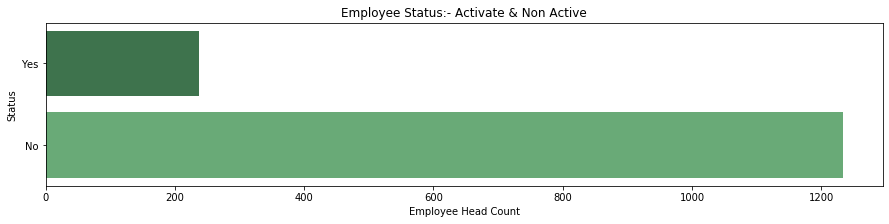

In [10]:
fig = plt.figure(figsize=(15,3))
sns.countplot(y="Attrition", data=data, palette="Greens_d")
plt.title("Employee Status:- Activate & Non Active")
plt.xlabel("Employee Head Count")
plt.ylabel("Status");

### One check for missing values

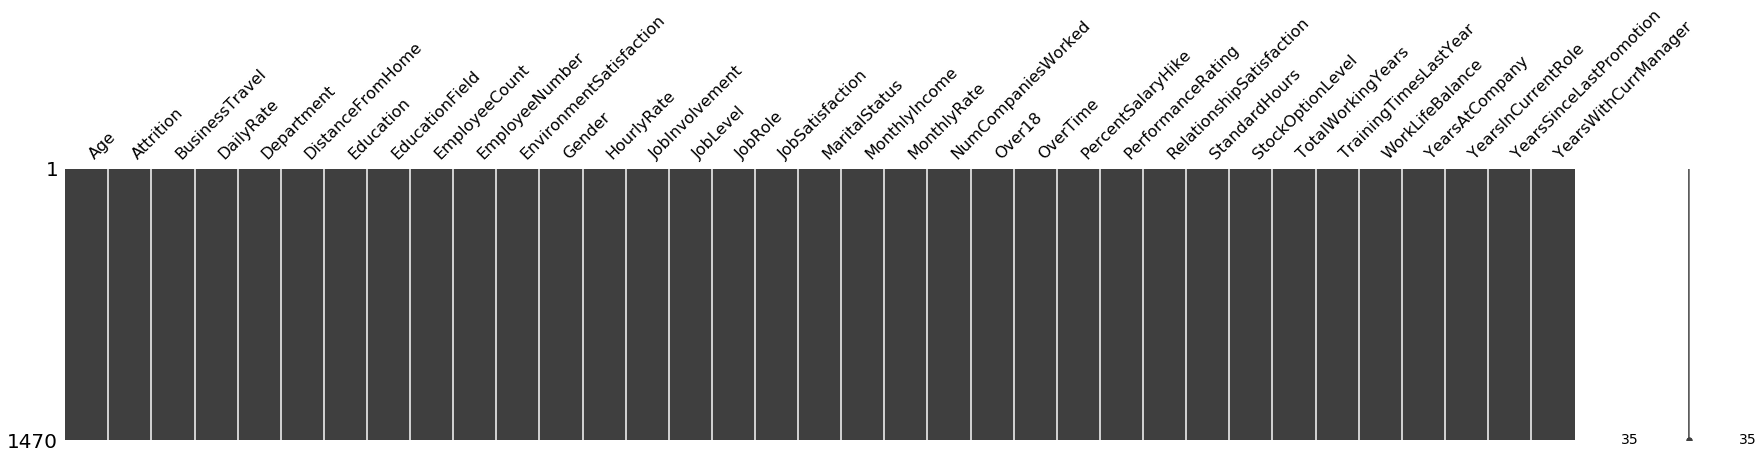

In [11]:
missingno.matrix(data, figsize = (30,5));

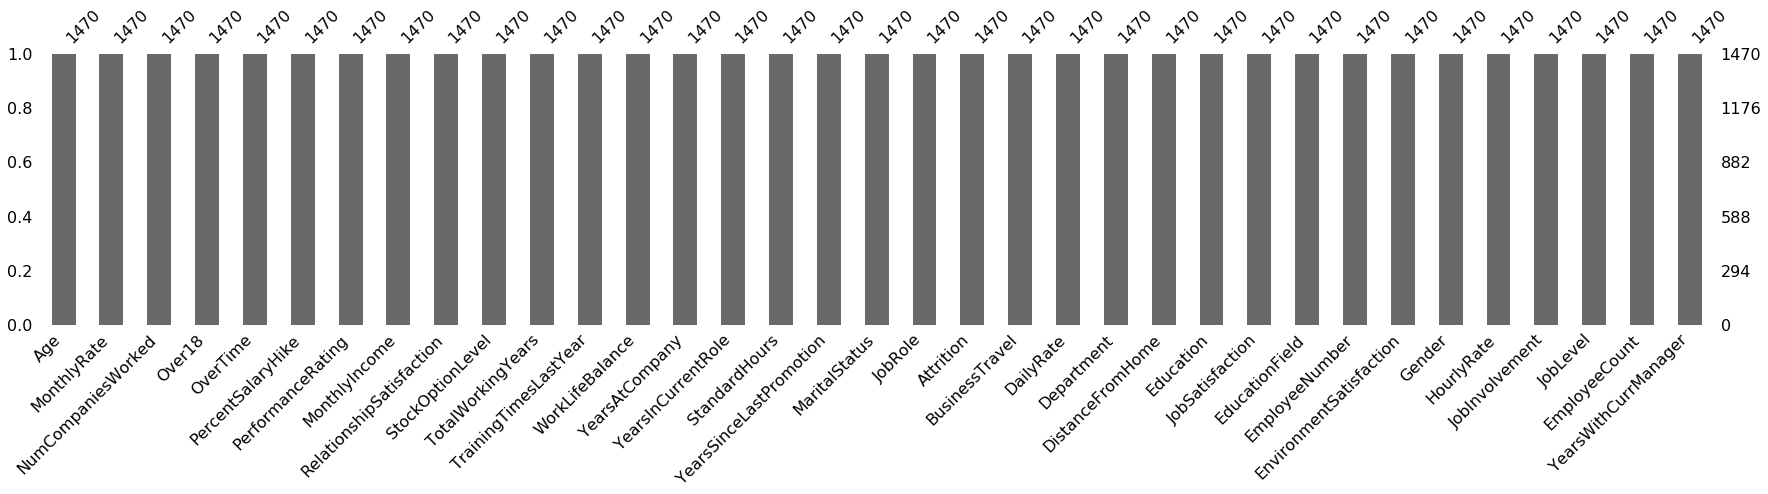

In [12]:
missingno.bar(data, sort='ascending', figsize = (30,5));

We did not have missing values in dataset

In [13]:
# Let's convert str to numbers
data.loc[data['Attrition'] == 'Yes', 'Attrition'] = 1
data.loc[data['Attrition'] == 'No', 'Attrition'] = 0

In [14]:
# To perform our data analysis, let's create new dataframes.
dataset_bin = pd.DataFrame() # To contain our dataframe with our discretised continuous variables 
dataset_con = pd.DataFrame() # To contain our dataframe with our continuous variables

### Feature: Age
We will use the Pandas Cut function to bin the data in equally sized buckets. We will also add our original feature to the dataset_con dataframe.

In [15]:
dataset_bin['Age'] = pd.cut(data['Age'], 10) # discreated
dataset_con["Age"] = data['Age'] # continues
dataset_con.min()

Age    18
dtype: int64

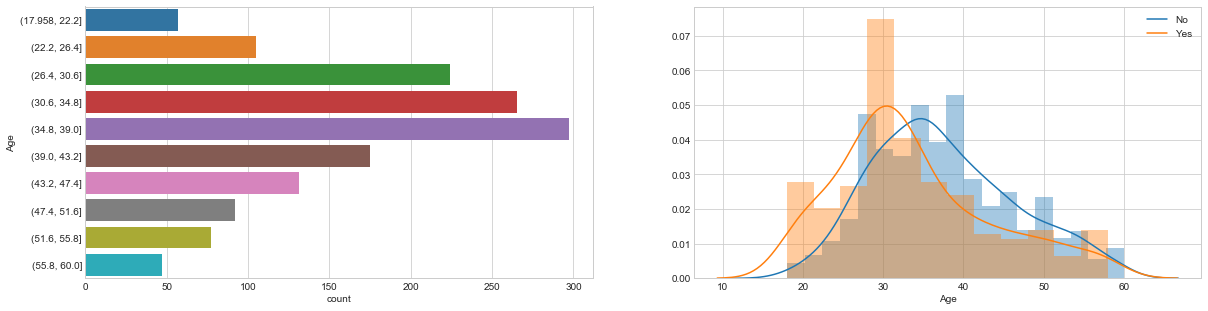

In [18]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)

sns.countplot(y='Age', data=dataset_bin);

plt.subplot(1, 2, 2)
sns.distplot(data.loc[data["Attrition"]==0]["Age"], kde_kws={"label":"No"});
sns.distplot(data.loc[data["Attrition"]==1]['Age'], kde_kws={"label":"Yes"});


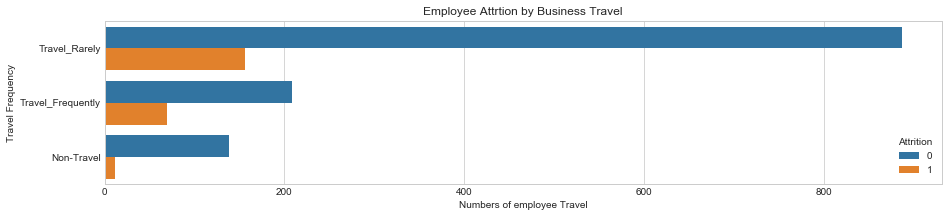

In [19]:
plt.figure(figsize=(15,3))
sns.countplot(y="BusinessTravel", hue="Attrition", data=data)
plt.title("Employee Attrtion by Business Travel")
plt.xlabel("Numbers of employee Travel")
plt.ylabel("Travel Frequency");

We can see above those employee travel rarely, they have high attrtion rate 

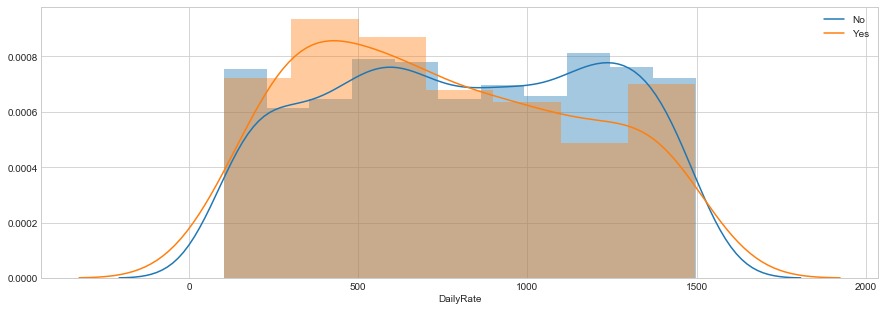

In [20]:
plt.figure(figsize=(15,5))
sns.distplot(data.loc[data["Attrition"]==0]["DailyRate"], kde_kws={"label":"No"});
sns.distplot(data.loc[data["Attrition"]==1]['DailyRate'], kde_kws={"label":"Yes"});

We can see here also whose getting high daily rate they are living. 

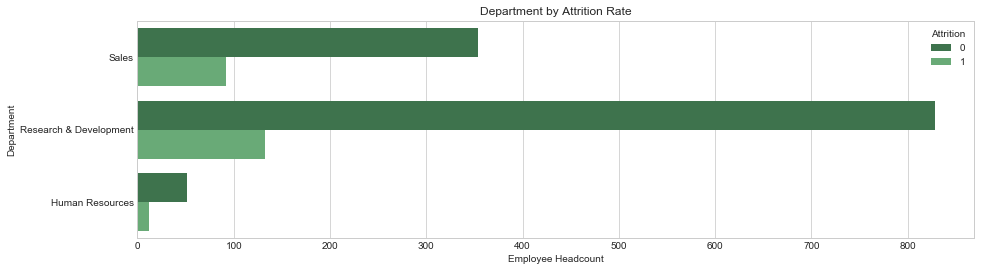

In [21]:
plt.figure(figsize=(15,4))
sns.countplot(y="Department", hue='Attrition', data=data, palette="Greens_d");
plt.title("Department by Attrition Rate")
plt.xlabel("Employee Headcount")
plt.ylabel("Department");

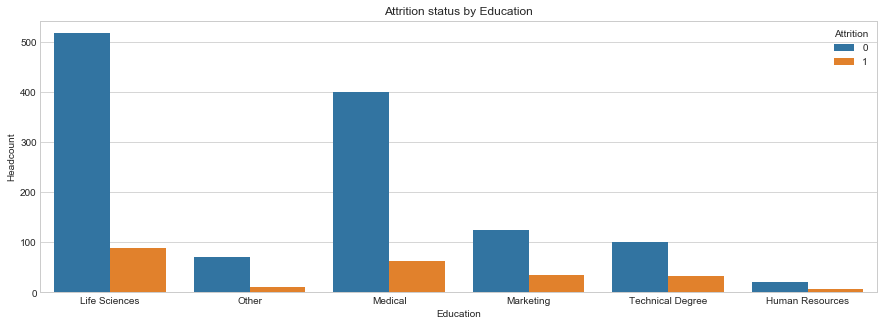

In [22]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15, 5))
sns.countplot(x="EducationField", hue="Attrition", data=data);
plt.title("Attrition status by Education");
plt.xlabel("Education")
plt.ylabel("Headcount");

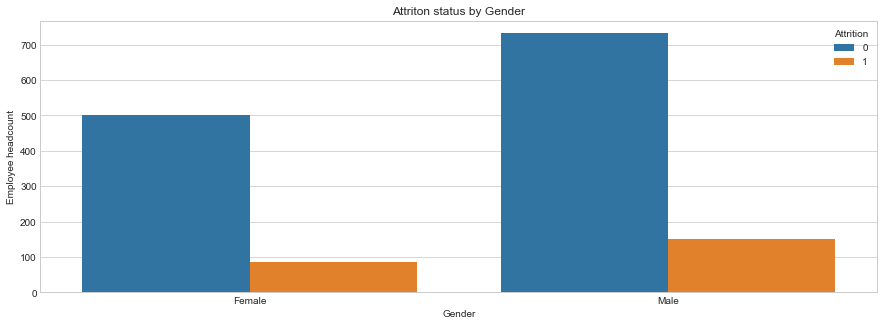

In [23]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15, 5))
sns.countplot(x="Gender",hue="Attrition", data=data)
plt.title("Attriton status by Gender")
plt.ylabel("Employee headcount");


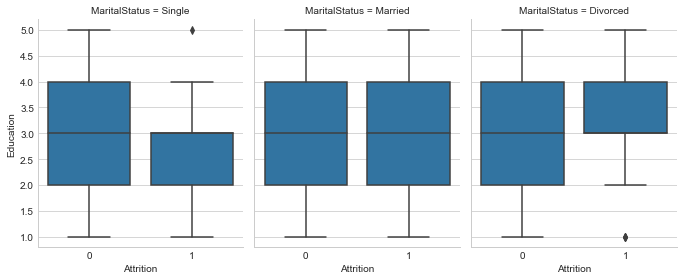

In [24]:
ftg = sns.FacetGrid(data, col='MaritalStatus', size=4, aspect=.8)
ftg = ftg.map(sns.boxplot, 'Attrition', 'Education');


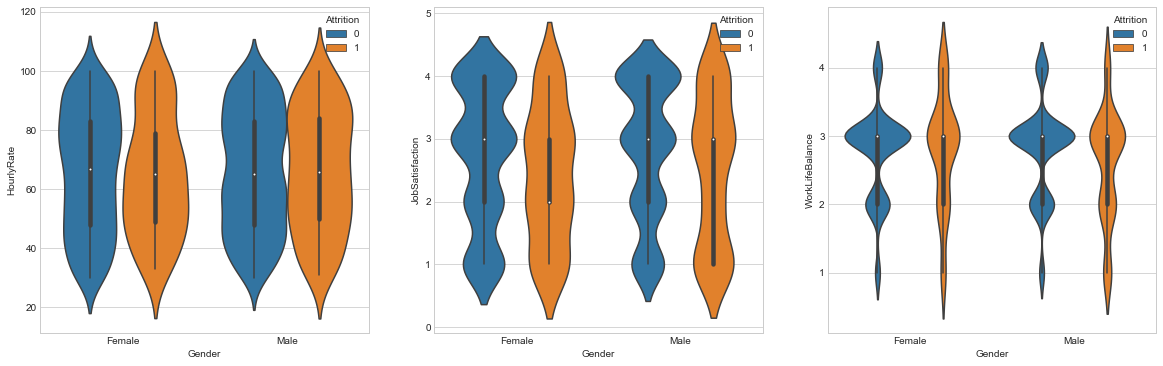

In [25]:
plt.figure(figsize=(20,6)) 
plt.subplot(1, 3, 1)
sns.violinplot(x='Gender', y='HourlyRate', hue='Attrition', data=data)

plt.subplot(1, 3, 2)
sns.violinplot(x='Gender', y='JobSatisfaction', hue='Attrition', data=data)

plt.subplot(1, 3, 3)
sns.violinplot(x='Gender', y='WorkLifeBalance', hue='Attrition', data=data);

Text(0, 0.5, 'Relationship with Current Manager in years')

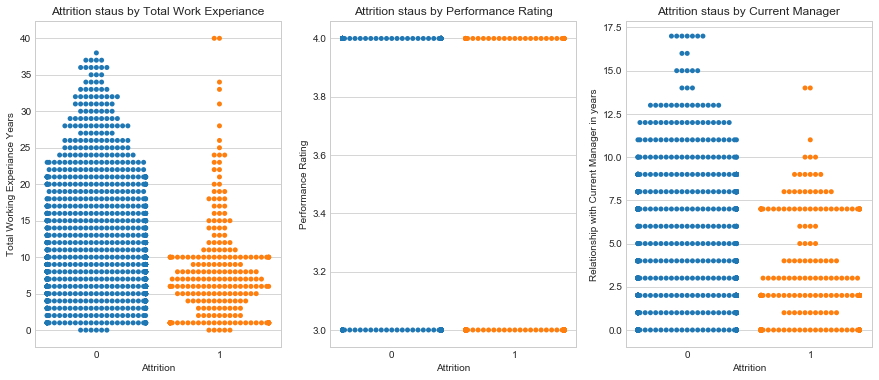

In [26]:
plt.figure(figsize=(15,6))

plt.subplot(1, 3, 1)
sns.swarmplot(x='Attrition', y='TotalWorkingYears', data=data)
plt.title("Attrition staus by Total Work Experiance")
plt.ylabel("Total Working Experiance Years")

plt.subplot(1, 3, 2)
sns.swarmplot(x="Attrition", y="PerformanceRating", data=data)
plt.title("Attrition staus by Performance Rating")
plt.ylabel("Performance Rating")

plt.subplot(1, 3, 3)
sns.swarmplot(x="Attrition", y="YearsWithCurrManager", data=data);
plt.title("Attrition staus by Current Manager")
plt.ylabel("Relationship with Current Manager in years")

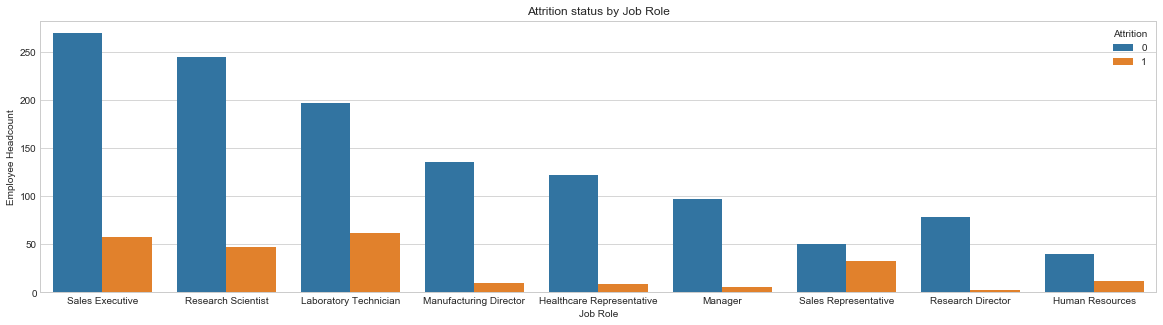

In [27]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20, 5))
sns.countplot(x="JobRole", hue="Attrition", data=data);
plt.title("Attrition status by Job Role")
plt.xlabel("Job Role")
plt.ylabel("Employee Headcount");

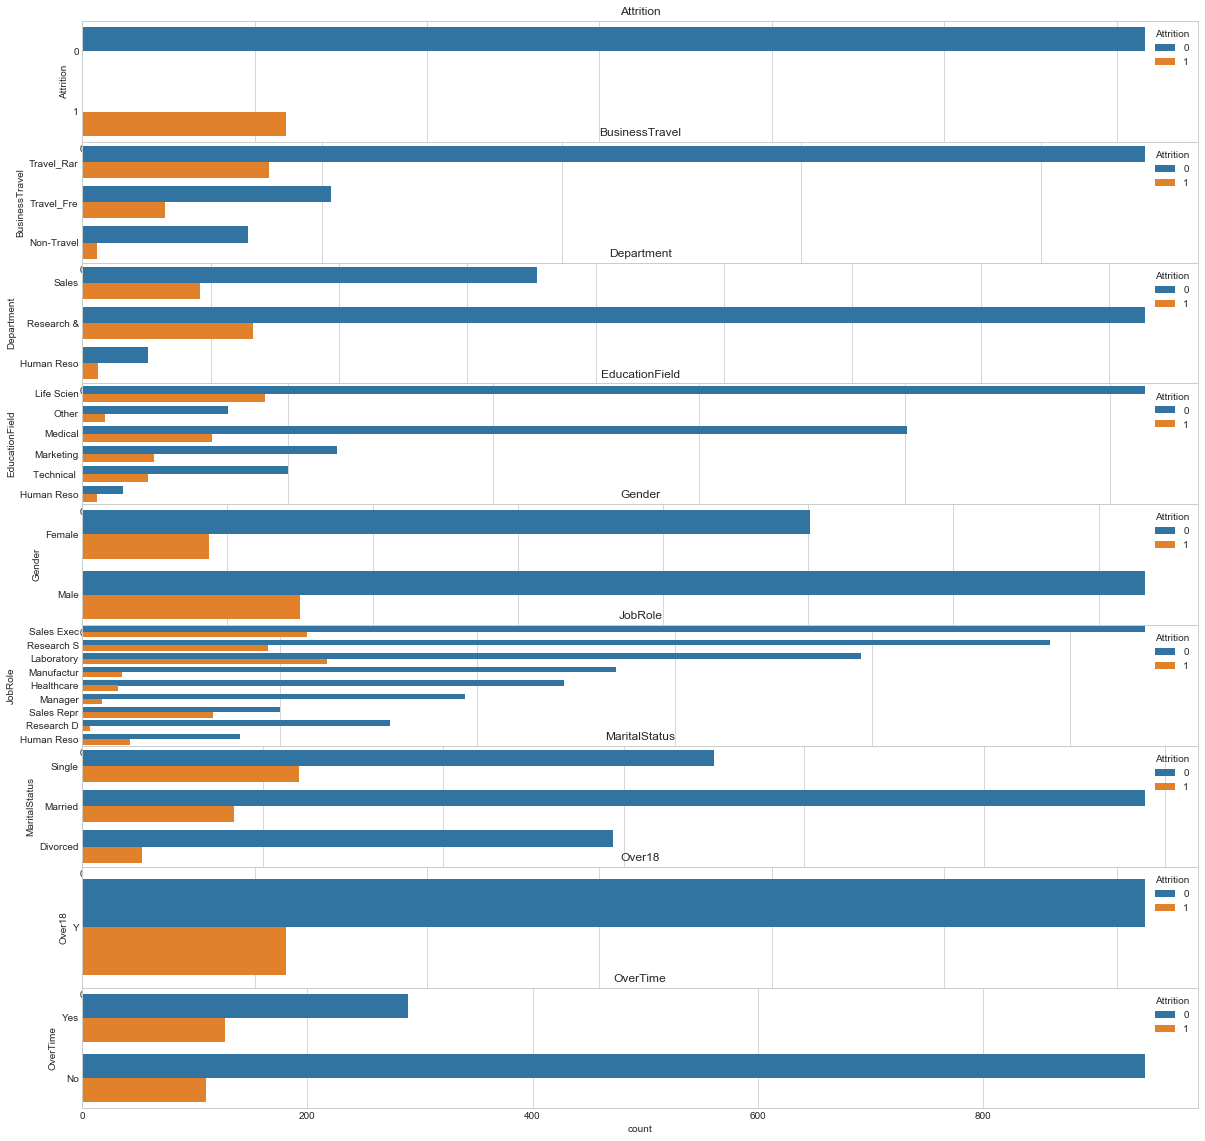

In [28]:
# Plot a count of the categories from each categorical feature split by our prediction class: Attrition.
def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
plot_bivariate_bar(data, hue='Attrition', cols=1, width=20, height=20, hspace=0, wspace=0)

In [29]:
#Let's convert categorical into numbers
labelencoder = LabelEncoder()
df_encoder = data.apply(lambda col: labelencoder.fit_transform(col))
df_encoder.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,0,1,...,3,0,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,0,2,...,1,0,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,0,3,...,2,0,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,4,...,3,0,1,6,3,2,2,2,2,2


### Feature Correlation
Correlation ia s measure of how much two random variables change together. Features should be uncorrelated with each other and highly correlated to the feature we’re trying to predict.

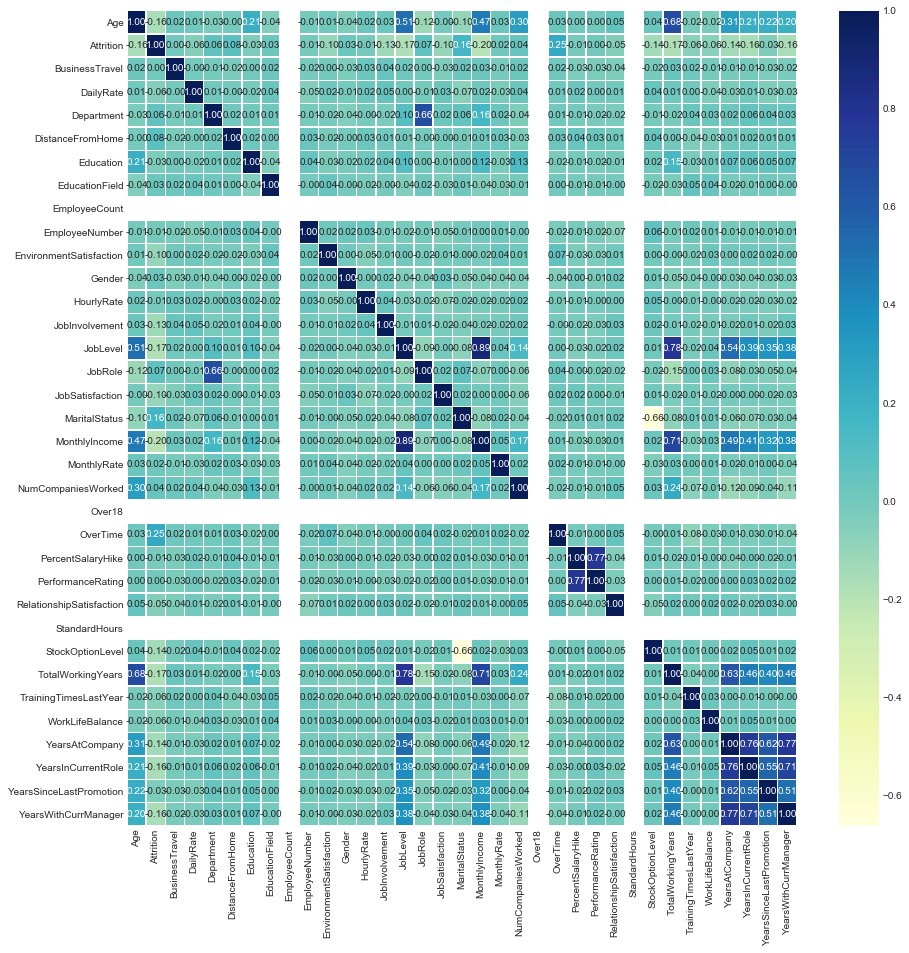

In [30]:
corr_matrix = df_encoder.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f', cmap="YlGnBu")

We have observed above three features do not have correlation so let's drop these featurs `EmployeeCount`, `Over18` and `StandardHours`

**Let's create new dataset**

In [31]:
df_encoder_2 = df_encoder.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1)
df_encoder_2.shape

(1470, 32)

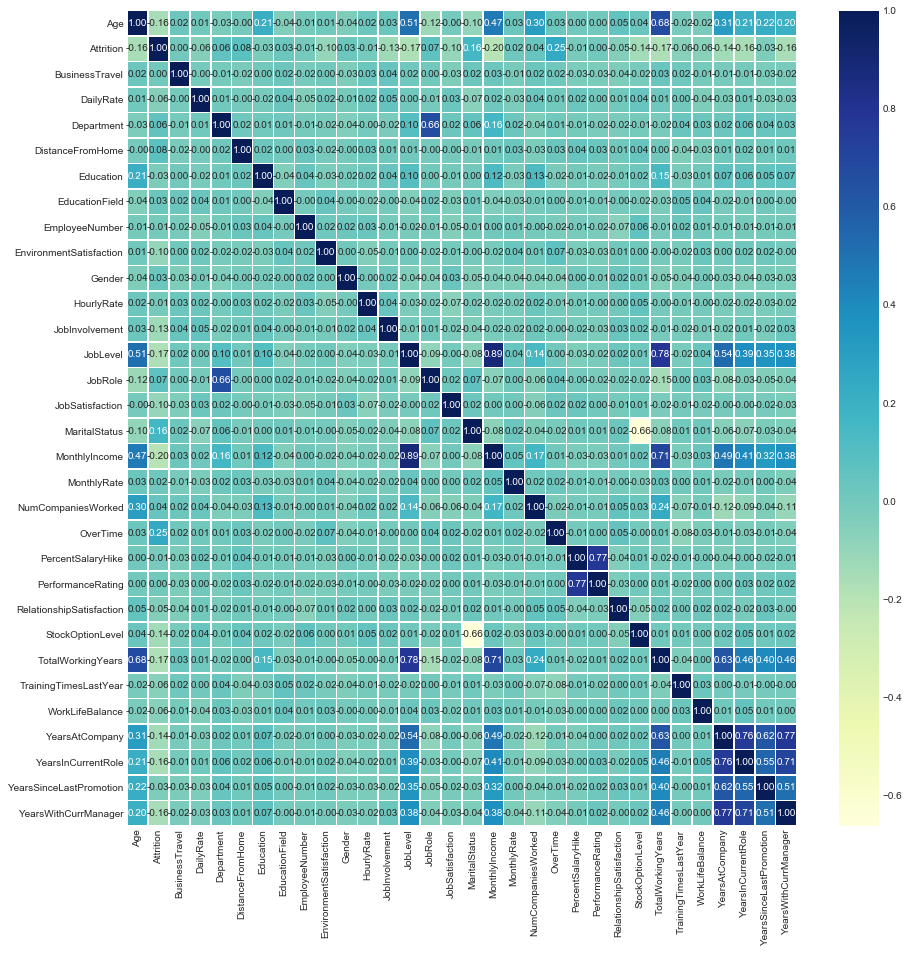

In [32]:
corr_matrix = df_encoder_2.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f', cmap="YlGnBu")

### Feature Importance
Random forest consists of a number of decision trees. Every node in the decision trees is a condition on a single feature, designed to split the dataset into two so that similar response values end up in the same set. The measure based on which the (locally) optimal condition is chosen is called impurity. When training a tree, it can be computed how much each feature decreases the weighted impurity in a tree. For a forest, the impurity decrease from each feature can be averaged and the features are ranked according to this measure. This is the feature importance measure exposed in sklearn’s Random Forest implementations.

In [33]:
m = RandomForestClassifier()
m.fit(df_encoder_2.drop('Attrition', axis=1), df_encoder_2["Attrition"])
print("Model score on full dataset", m.score(df_encoder_2.drop('Attrition', axis=1), df_encoder_2["Attrition"]))

importance = m.feature_importances_
importance = pd.DataFrame(importance, index=df_encoder_2.drop("Attrition", axis=1).columns, columns=["importance"])
importance.sort_values(by="importance", ascending=True)

Model score on full dataset 1.0


,importance
PerformanceRating,0.005002
Gender,0.008015
BusinessTravel,0.012363
Department,0.012551
Education,0.020338
JobLevel,0.021553
MaritalStatus,0.021559
WorkLifeBalance,0.021827
EducationField,0.022382
YearsInCurrentRole,0.022449


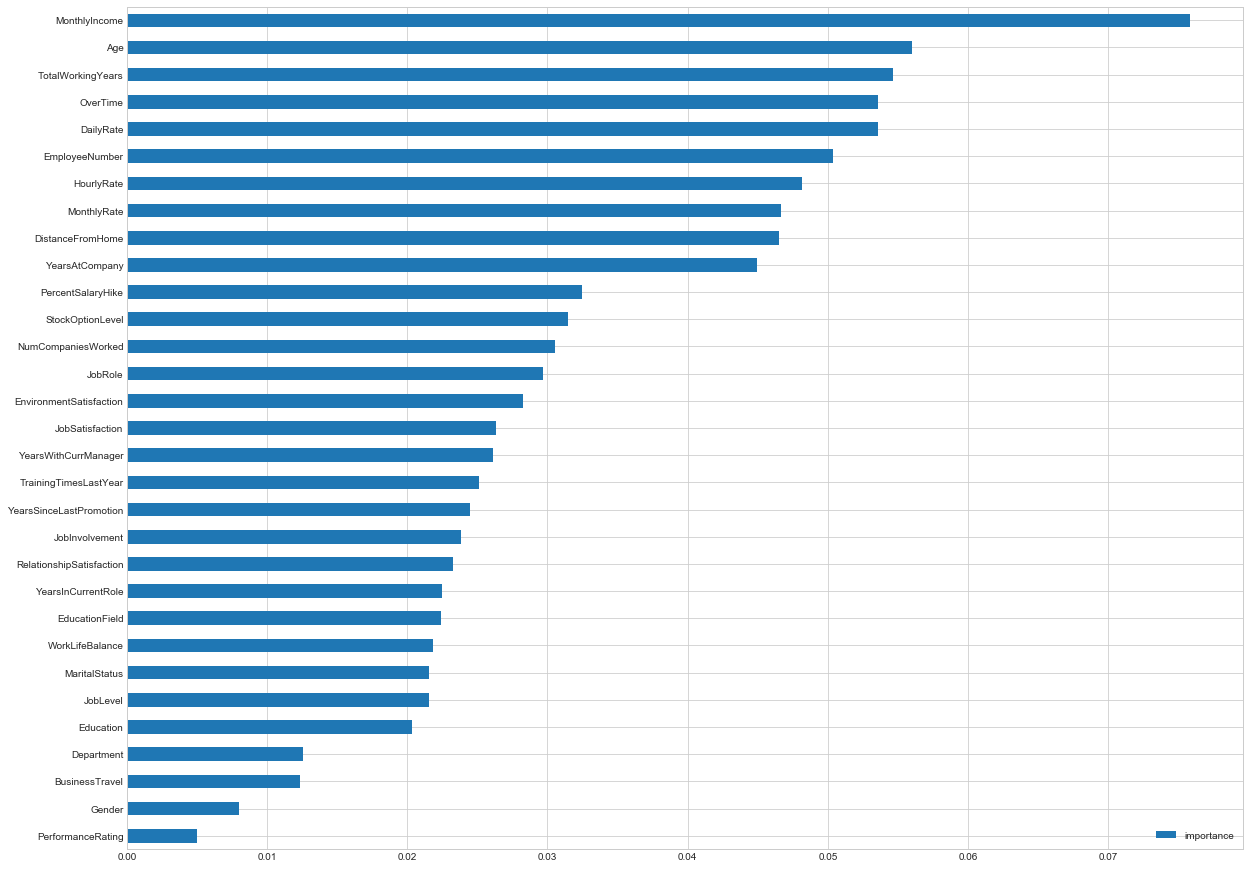

In [34]:
importance.sort_values(by="importance", ascending=True).plot(kind='barh', figsize=(20, len(importance)/2));

#### Let's normalized before more expariments, each features should be centralized(zero mean)  and with unit variance


In [35]:
#Make X and y

X = df_encoder_2.drop("Attrition", axis=1)
y = df_encoder_2["Attrition"]

#Let's split the data into train and test

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1176, 31), (1176,), (294, 31), (294,))

In [39]:
from sklearn.preprocessing import StandardScaler

X_train_norm = StandardScaler().fit(X_train).transform(X_train)
# Valid set also treat as same train data
X_valid_norm = StandardScaler().fit(X_valid).transform(X_valid)


In [40]:
# See the improvement of a model then pick up the high performance perameters
for i in range(10, 110, 10):
    print(f"trying model with {i} estimators")
    m = RandomForestClassifier(n_estimators=i, min_samples_leaf=2, oob_score=True, n_jobs=4).fit(X_train_norm, y_train)
    print(f"Model accuracy on valid set: {m.score(X_valid, y_valid)*100:.2f}%")
    print("")
    

trying model with 10 estimators
Model accuracy on valid set: 69.73%

trying model with 20 estimators
Model accuracy on valid set: 85.71%

trying model with 30 estimators
Model accuracy on valid set: 86.73%

trying model with 40 estimators
Model accuracy on valid set: 86.39%

trying model with 50 estimators
Model accuracy on valid set: 80.27%

trying model with 60 estimators
Model accuracy on valid set: 77.89%

trying model with 70 estimators
Model accuracy on valid set: 86.05%

trying model with 80 estimators
Model accuracy on valid set: 86.73%

trying model with 90 estimators
Model accuracy on valid set: 84.35%

trying model with 100 estimators
Model accuracy on valid set: 80.27%



In [41]:
# Training the model
m = RandomForestClassifier()
m.fit(X_train_norm, y_train)
# Prediction
preds = m.predict(X_valid_norm)
# Evaluation
from sklearn import metrics
print("Accuary on valid set", metrics.accuracy_score(preds, y_valid))
print("Confustion Matrix: \n", metrics.confusion_matrix(preds, y_valid))

Accuary on valid set 0.8707482993197279
Confustion Matrix: 
 [[252  35]
 [  3   4]]


In [44]:
m.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

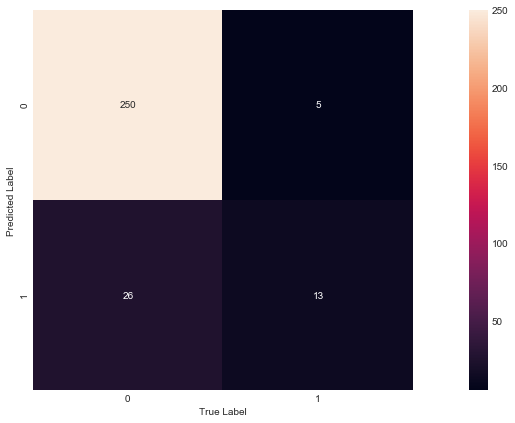

In [58]:
plt.figure(figsize=(20,7))
mat = confusion_matrix(y_valid, preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('True Label')
plt.ylabel('Predicted Label');

### XGB modeling

In [45]:
import xgboost as xgb

best = xgb.XGBClassifier(eta = 0.1,
                         min_child_weight=5,
                         colsample_bytree = 0.4,
                         max_depth = 3,
                         gamma=0.1,
                         learning_rate = 0.12345,
                         n_jobs=-1)
best.fit(X_train, y_train)
best.score(X_valid, y_valid)

preds = best.predict(X_valid)
# 
# Evaluation
print("Accuary on valid set", metrics.accuracy_score(preds, y_valid))
print("Confustion Matrix: \n", metrics.confusion_matrix(preds, y_valid))

Accuary on valid set 0.8945578231292517
Confustion Matrix: 
 [[250  26]
 [  5  13]]


Slighter better accuracy with XGBoost model.

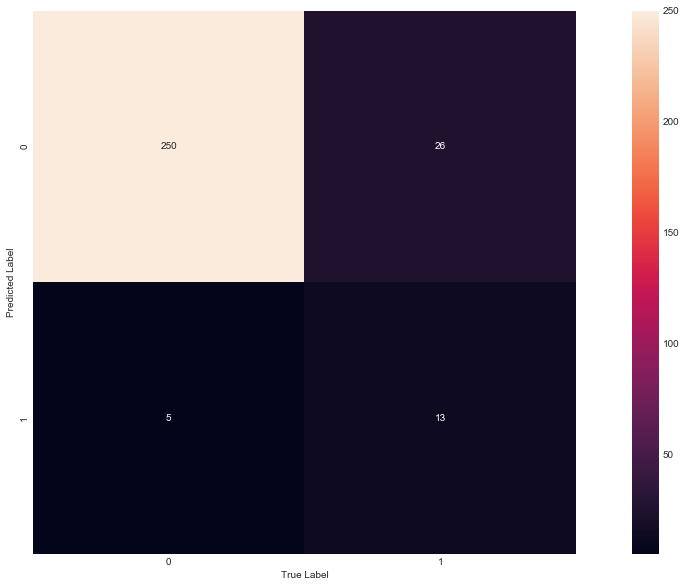

In [59]:
plt.figure(figsize=(20,10))
mat = confusion_matrix(y_valid, preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('True Label')
plt.ylabel('Predicted Label');

In [60]:
preds[:10]

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0])